<a href="https://colab.research.google.com/github/ArunamAlok/DSSI/blob/main/A3_3_Bonus_Alok_Arunam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ade_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/dataset2-adverse_drug_effects-23_sept-raw.csv')
print(ade_ds.head())
ade_ds.info()

         ID  LABEL                                               Text
0   6460590   NEG    Clioquinol intoxication occurring in the trea...
1   8600337   NEG    "Retinoic acid syndrome" was prevented with s...
2   8402502   NEG    BACKGROUND: External beam radiation therapy o...
3   8700794   NEG    Although the enuresis ceased, she developed t...
4  17662448   NEG    A 42-year-old woman had uneventful bilateral ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20958 entries, 0 to 20957
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      20958 non-null  int64 
 1   LABEL   20958 non-null  object
 2   Text    20958 non-null  object
dtypes: int64(1), object(2)
memory usage: 491.3+ KB


In [ ]:
# convert text data to counts matrix
# normalize counts matrix to TF-IDF form

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(ade_ds.Text)
words= vectorizer.get_feature_names_out()
print(words)
print(X_tfidf.shape)
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, ade_ds.LABEL, test_size=0.30, random_state=0)
#print(X_train.shape, X_test.shape)



['00' '000' '00001' ... 'zygomycetes' 'zygomycosis' 'zyprexa']
(20958, 17122)
n_samples: 20958, n_features: 17122


In [ ]:
#fit the model K-Means Cluster with k=2

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k_val=2
kmeans = KMeans(n_clusters=k_val,  max_iter=100, n_init=1, random_state=5).fit(X_tfidf)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of documents assigned to each cluster: {cluster_sizes}")
silhouette_avg = silhouette_score(X_tfidf,kmeans.fit_predict(X_tfidf))
print("The average silhouette_score is :", silhouette_avg)

print('\n clusters and words associated')
words= vectorizer.get_feature_names_out()
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

results = pd.DataFrame()
results['Biomedical Statements'] = ade_ds.Text
results['cluster'] = kmeans.labels_
results['Label']=ade_ds.LABEL

print(results.sample(5))

Number of documents assigned to each cluster: [12579  8379]
The average silhouette_score is : 0.0028927114321090353

 clusters and words associated
0 : with, and, of, in, was, after, the, patient, to, for, case, patients, report, therapy, were, treatment, we, developed, year, old, by, induced, an, treated, associated
1 : the, of, in, to, and, is, this, be, with, that, treatment, patients, for, was, as, are, been, case, may, patient, drug, an, use, cases, therapy
                                   Biomedical Statements  cluster  Label
14023   BACKGROUND: NVP is a non-nucleoside reverse t...        1   NEG 
1113    Four patients were neutropenic (less than 500...        0   NEG 
16660   Repeat catheter and peripheral culturing occu...        0   NEG 
17128  Indinavir-associated nephrolithiasis and chron...        0    POS
13546   Supportive management was the mainstay of the...        1   NEG 


Cluster 0: with and of in was after the patient to for
Cluster 1: the of in to and is this be with that


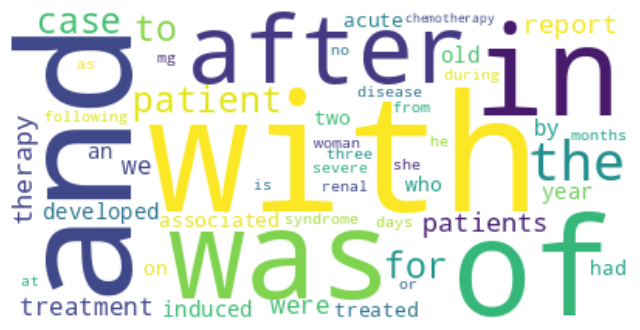

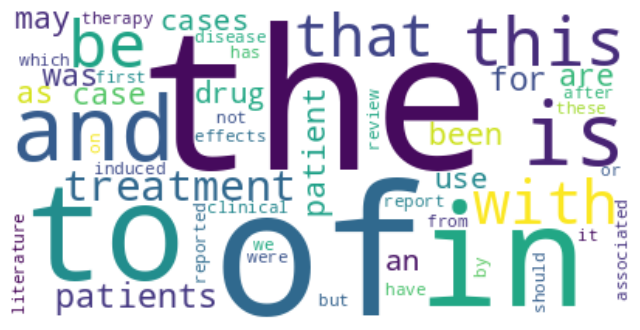

In [ ]:
#Get the word cloud associated with the K-Means model with k=2

from wordcloud import WordCloud
import matplotlib.pyplot as plt

true_k=2

centroids = kmeans.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = kmeans.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

In [ ]:
#fit the model K-Means Cluster with k=3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k_val=3
kmeans = KMeans(n_clusters=k_val,  max_iter=100, n_init=1, random_state=5).fit(X_tfidf)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of documents assigned to each cluster: {cluster_sizes}")
silhouette_avg = silhouette_score(X_tfidf,kmeans.fit_predict(X_tfidf))
print("The average silhouette_score is :", silhouette_avg)

print('\n clusters and words associated')
words= vectorizer.get_feature_names_out()
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
results = pd.DataFrame()
results['Biomedical Statements'] = ade_ds.Text
results['cluster'] = kmeans.labels_
results['Label']=ade_ds.LABEL

print(results.sample(5))

Number of documents assigned to each cluster: [ 3159 10192  7607]
The average silhouette_score is : 0.003106472231438018

 clusters and words associated
0 : was, the, and, of, with, to, in, patient, by, after, for, mg, treated, on, therapy, treatment, year, old, an, day, months, he, she, at, discontinued
1 : with, and, of, in, case, report, after, patient, the, patients, for, we, were, to, therapy, developed, induced, treatment, associated, year, an, who, old, acute, by
2 : the, of, in, is, to, and, this, be, with, that, treatment, patients, are, for, been, as, may, has, have, an, reported, drug, case, use, therapy
                                   Biomedical Statements  cluster  Label
12010   A 44-year-old Caucasian male who had been on ...        1   NEG 
8047    Cross-reactivity between clindamycin and ampi...        1   NEG 
15535   The patient was also found to have Hashimoto'...        0   NEG 
2001    The patient presented with widespread medial ...        0   NEG 
2495    He d

In [ ]:
#fit the model K-Means Cluster with k=2 to k=10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2,11):
  model = KMeans(n_clusters=i,  max_iter=100, n_init=1, random_state=5).fit(X_tfidf)
  cluster_ids, cluster_sizes = np.unique(model.labels_, return_counts=True)
  print(f"Number of clusters: {i}")
  print(f"Number of documents assigned to each cluster: {cluster_sizes}")
  silhouette_avg = silhouette_score(X_tfidf,model.fit_predict(X_tfidf))
  print("The average silhouette_score is :", "%.5f" %silhouette_avg)


Number of clusters: 2
Number of documents assigned to each cluster: [12579  8379]
The average silhouette_score is : 0.00289
Number of clusters: 3
Number of documents assigned to each cluster: [ 3159 10192  7607]
The average silhouette_score is : 0.00311
Number of clusters: 4
Number of documents assigned to each cluster: [ 2849 10089  5651  2369]
The average silhouette_score is : 0.00296
Number of clusters: 5
Number of documents assigned to each cluster: [2837 9560 5209 2331 1021]
The average silhouette_score is : 0.00340
Number of clusters: 6
Number of documents assigned to each cluster: [7309 3627 2340 2257  968 4457]
The average silhouette_score is : 0.00375
Number of clusters: 7
Number of documents assigned to each cluster: [2536 3092 2274 2089  966 6334 3667]
The average silhouette_score is : 0.00408
Number of clusters: 8
Number of documents assigned to each cluster: [1083 3233 4099 2476 1326 1047  907 6787]
The average silhouette_score is : 0.00447
Number of clusters: 9
Number of 

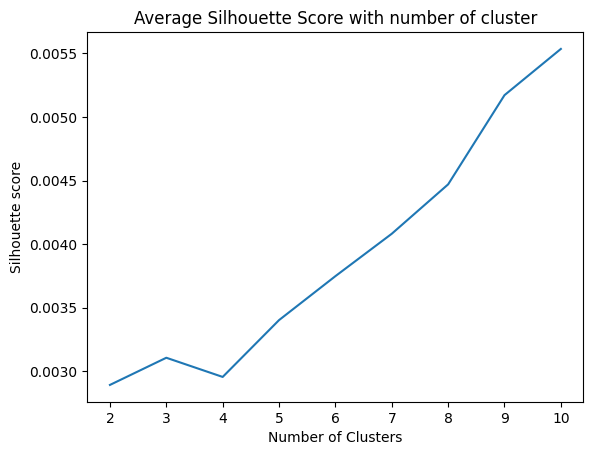

In [ ]:
# Plotting Silhouette Scores

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

ss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i, max_iter=100, n_init=1, random_state=5)
    kmeans.fit(X_tfidf)
    ss1=silhouette_score(X_tfidf,kmeans.fit_predict(X_tfidf))
    ss.append(ss1)

plt.plot(range(2,11),ss)
plt.title('Average Silhouette Score with number of cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

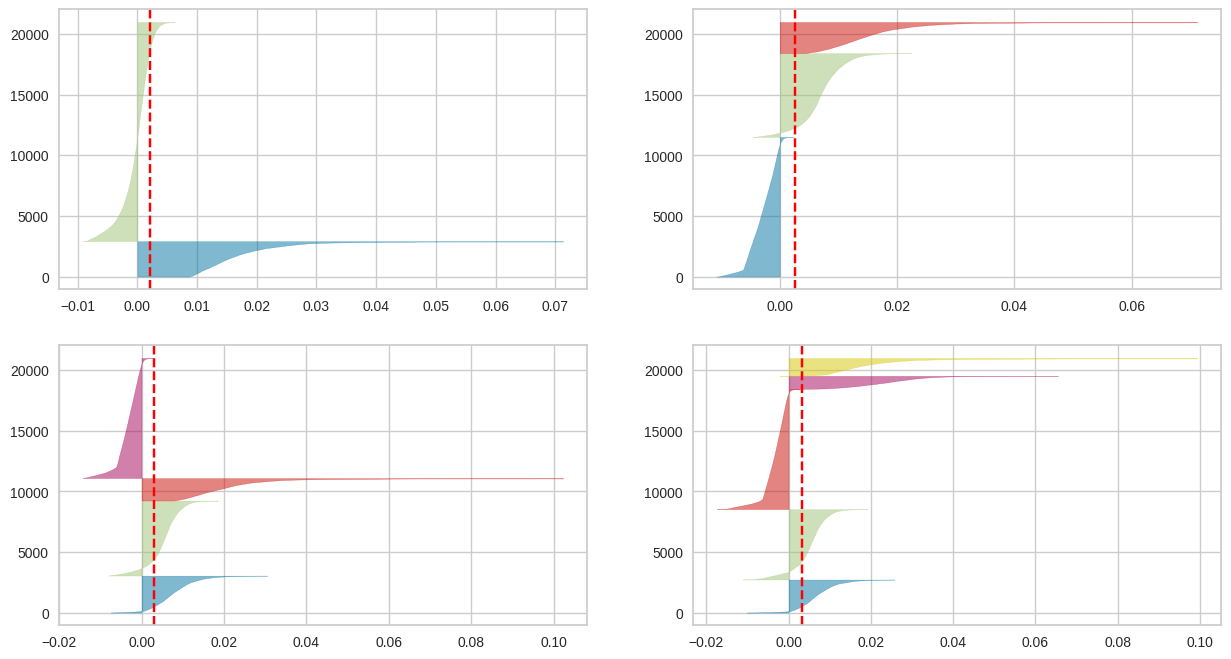

In [ ]:
# Visualising Silhouette Score

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_tfidf)